In [7]:
import torch
print(torch.cuda.is_available())  
print(torch.cuda.device_count()) 
print(torch.cuda.get_device_name(0))  

True
1
NVIDIA RTX A4000


In [3]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionImg2ImgPipeline
from diffusers import DiffusionPipeline

In [2]:
pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image = pipe(prompt).images[0]

C:\Users\FAST\.conda\envs\tens\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\FAST\.conda\envs\tens\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\FAST\.cache\huggingface\hub\models--stable-diffusion-v1-5--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to ac

In [4]:
model_id = "runwayml/stable-diffusion-v1-5"  
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")

C:\Users\FAST\.conda\envs\tens\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\FAST\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading pipeline components...: 100%|████████████████████████████████████████████████████| 7/7 [00:02<00:00,

In [13]:
init_image = Image.open("dog.jpeg").convert("RGB").resize((512, 512))

prompts = [
    "a fluffy dog as a fantasy watercolor painting",
    "a cyberpunk-style neon dog portrait",
    "a dog painted in the abstract style of Pablo Picasso",
    "a highly detailed ink sketch of a majestic dog",
    "a vibrant pop art illustration of a happy dog"
]

In [14]:
def function(prompts,init_image,strengthh, guidance_scalee, num_inference_stepss):
    generated_images = []
    for prompt in prompts:
        with torch.inference_mode():  # Ensure inference mode for speed
            image = pipe(prompt=prompt, image=init_image, strength=strengthh, guidance_scale=guidance_scalee, num_inference_steps=num_inference_stepss).images[0]
        generated_images.append((prompt, image))
    
    # Display images using Matplotlib
    fig, axes = plt.subplots(1, len(generated_images) + 1, figsize=(15, 5))
    
    axes[0].imshow(init_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    
    for i, (prompt, img) in enumerate(generated_images):
        axes[i + 1].imshow(img)
        axes[i + 1].set_title(prompt)
        axes[i + 1].axis("off")
    
    plt.tight_layout()
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 13.62it/s]


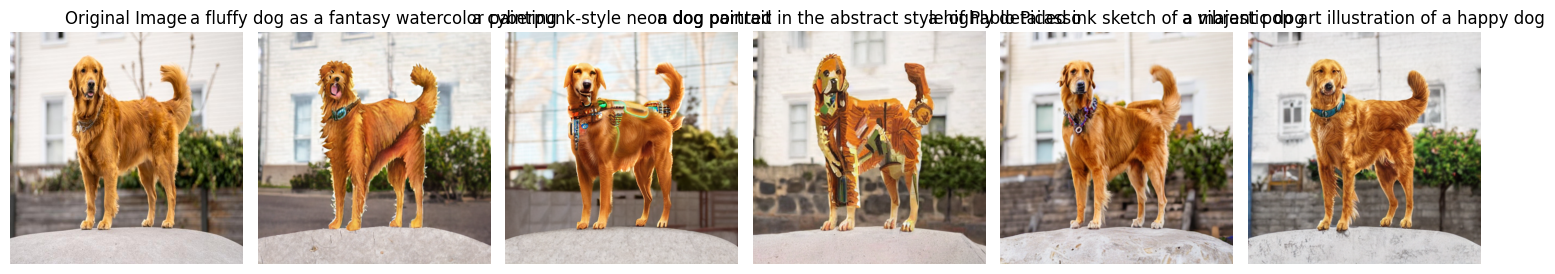

In [15]:
 function(prompts,image,0.5, 7.5,50)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:01<00:00, 13.22it/s]


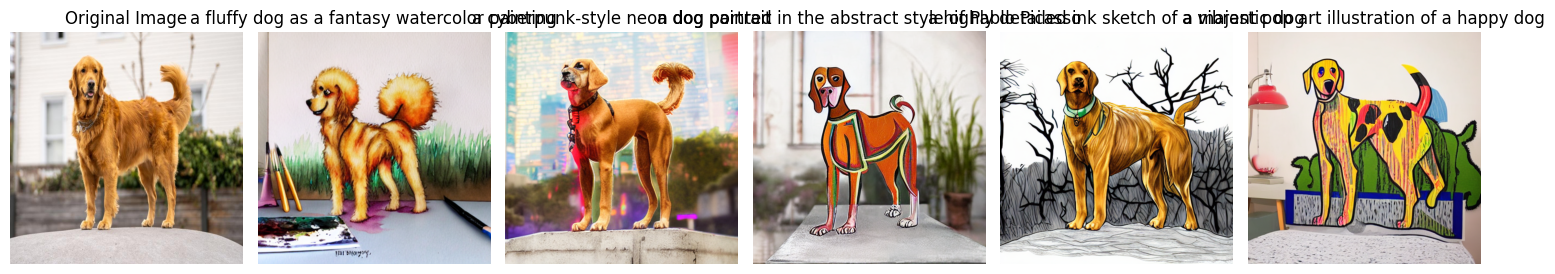

In [16]:
 function(prompts,image,0.75, 7.5,25)

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:02<00:00, 13.68it/s]


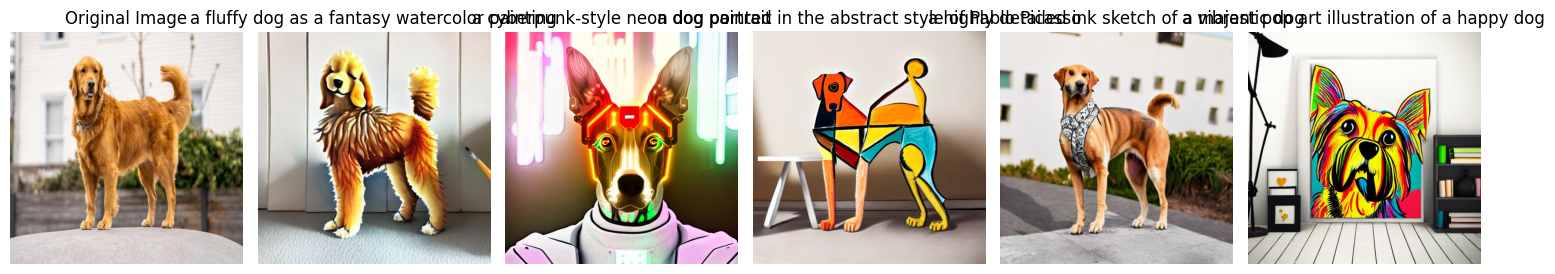

In [19]:
 function(prompts,image,0.75, 15,50)